In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/Crop-prediction-using-Machine-Learning/cpdata.csv')

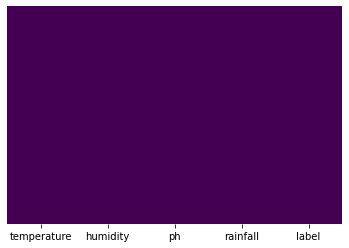

In [ ]:
sns.heatmap(data.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

In [ ]:
# making the features and the labels

Features = pd.DataFrame(data.iloc[:,:-1])
Labels = pd.DataFrame(data.iloc[:,-1:])

In [ ]:
# standardising the values of the Features dataframe 

for col in list(Features.columns):
  scale_col = StandardScaler()
  scale_col.fit(Features[[col]])
  Features[[col]] = scale_col.transform(Features[[col]])

In [ ]:
# making the Labels to One Hot Encoded

Labels_ohe = pd.get_dummies(data=Labels, prefix = "")

In [ ]:
X = np.array(Features)
Y = np.array(Labels_ohe)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [ ]:
# making the model

model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(31, activation = 'softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam()
metric1 = tf.keras.metrics.categorical_accuracy
metric2 = tf.keras.metrics.Precision
metric3 = tf.keras.metrics.Recall
sparse_loss = tf.keras.metrics.SparseCategoricalCrossentropy(name='loss')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
model_epochs = 100

learning_rate_reduction = ReduceLROnPlateau(monitor= "val_accuracy", 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

# apply early stopping

# early_stopping = tf.keras.callbacks.EarlyStopping(
#                                             monitor= "val_accuracy",
#                                             patience=50,
#                                             verbose=1,
#                                             mode="auto",
#                                             restore_best_weights=True)

history =  model.fit(X_train, 
                      Y_train,
                      validation_split = 0.2,
                      epochs = model_epochs,
                      batch_size = 64,
                      callbacks = [learning_rate_reduction])

Epoch 1/100
35/35 [==============================] - 0s 6ms/step - loss: 0.3740 - accuracy: 0.8508 - val_loss: 0.2825 - val_accuracy: 0.9014
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3646 - accuracy: 0.8647 - val_loss: 0.2827 - val_accuracy: 0.8996
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8651 - val_loss: 0.2819 - val_accuracy: 0.9014
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3576 - accuracy: 0.8656 - val_loss: 0.2825 - val_accuracy: 0.9032
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3575 - accuracy: 0.8625 - val_loss: 0.2818 - val_accuracy: 0.8996
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3614 - accuracy: 0.8625 - val_loss: 0.2817 - val_accuracy: 0.9014
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8566 - val_loss: 0.2814 - val_accuracy: 0.9032
Epoch 8/100
3

In [ ]:
model.save('lulu.h5')

In [ ]:
model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.9032


[0.2566659450531006, 0.9032257795333862]

In [ ]:
Y_pred = model.predict_classes(X_test)
Y_test_num = np.argmax(Y_test, axis = -1)

<Figure size 360x720 with 0 Axes>

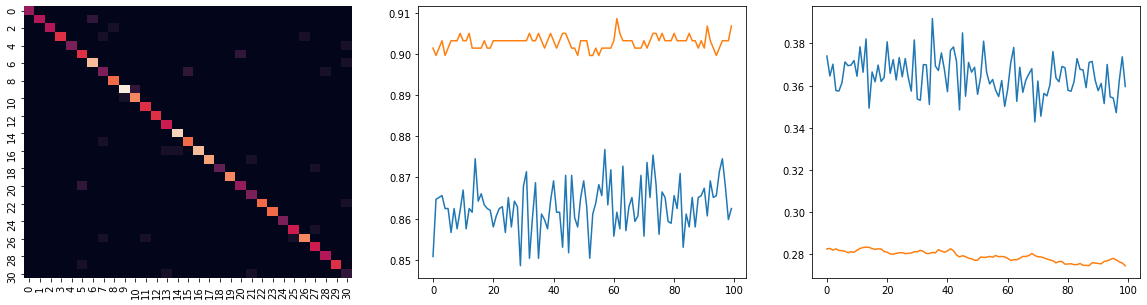

In [ ]:
plt.figure(figsize=(5,10))
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.heatmap(pd.DataFrame(confusion_matrix(Y_pred, Y_test_num)), cbar = False, ax = ax1)
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax3.plot(history.history['loss'])
ax3.plot(history.history['val_loss'])

In [ ]:
#### TF-lite process

model_name = 'Rice_model.h5'
model.save(model_name)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgb8yr1q9/assets


INFO:tensorflow:Assets written to: /tmp/tmpgb8yr1q9/assets
